# Student Performance Analysis 

### About data

This data set describes the student performance in various subjects and in this project aims to find what factors can play a role in the student grades

### Features

gender : (Female/Male)

race/ethnicity : (as groups A,B,C,D,E)

parental level of education : The parents' level of education

lunch : (standard or free/reduced)

test preparation course	: (completed or not)

math score : score in math 

reading score : score in reading

writing score : score in writing



Step 1 : importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
from dash import Dash, html, dcc
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Pre-processing

the data is almost clean but some attributes will be modified

In [8]:
df['parental level of education'].replace({"some college": "diploma",'some high school':'high school'},inplace=True)

change none to not completed

In [9]:
df['test preparation course'].replace({"none": "not completed"},inplace=True)

new feature that calculate the average score of the math, reading, writing scores

In [10]:
df['overall score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [11]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
358,male,group D,diploma,free/reduced,not completed,59,62,61,60.666667
179,female,group D,high school,standard,completed,97,100,100,99.000000
451,female,group E,diploma,standard,not completed,100,92,97,96.333333
958,female,group D,high school,standard,not completed,45,63,59,55.666667
891,female,group E,associate's degree,standard,not completed,85,92,85,87.333333
793,male,group E,high school,standard,completed,89,84,77,83.333333
273,female,group D,diploma,standard,not completed,65,70,71,68.666667
929,female,group C,high school,free/reduced,not completed,48,56,51,51.666667
758,female,group D,diploma,free/reduced,completed,52,59,65,58.666667
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,49.333333


create new columns to show the grade of students in all subjects

In [12]:
def create_grades(subject):
    df.loc[df[subject+' score'] >= 90, subject+' grade'] = 'A'
    df.loc[(90 > df[subject+' score']) & (df[subject+' score'] >= 80), subject+' grade'] = 'B'
    df.loc[(80 > df[subject+' score']) & (df[subject+' score'] >= 70), subject+' grade'] = 'C'
    df.loc[(70 > df[subject+' score']) & (df[subject+' score'] >= 60), subject+' grade'] = 'D'
    df.loc[60 > df[subject+' score'], subject+' grade'] = 'F'

In [13]:
create_grades('math')
create_grades('reading')
create_grades('writing')

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,not completed,72,72,74,72.666667,C,C,C
1,female,group C,diploma,standard,completed,69,90,88,82.333333,D,A,B
2,female,group B,master's degree,standard,not completed,90,95,93,92.666667,A,A,A
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,49.333333,F,F,F
4,male,group C,diploma,standard,not completed,76,78,75,76.333333,C,C,C


## EDA : exploratory data analysis

the figure below demonstrate each variables and their values

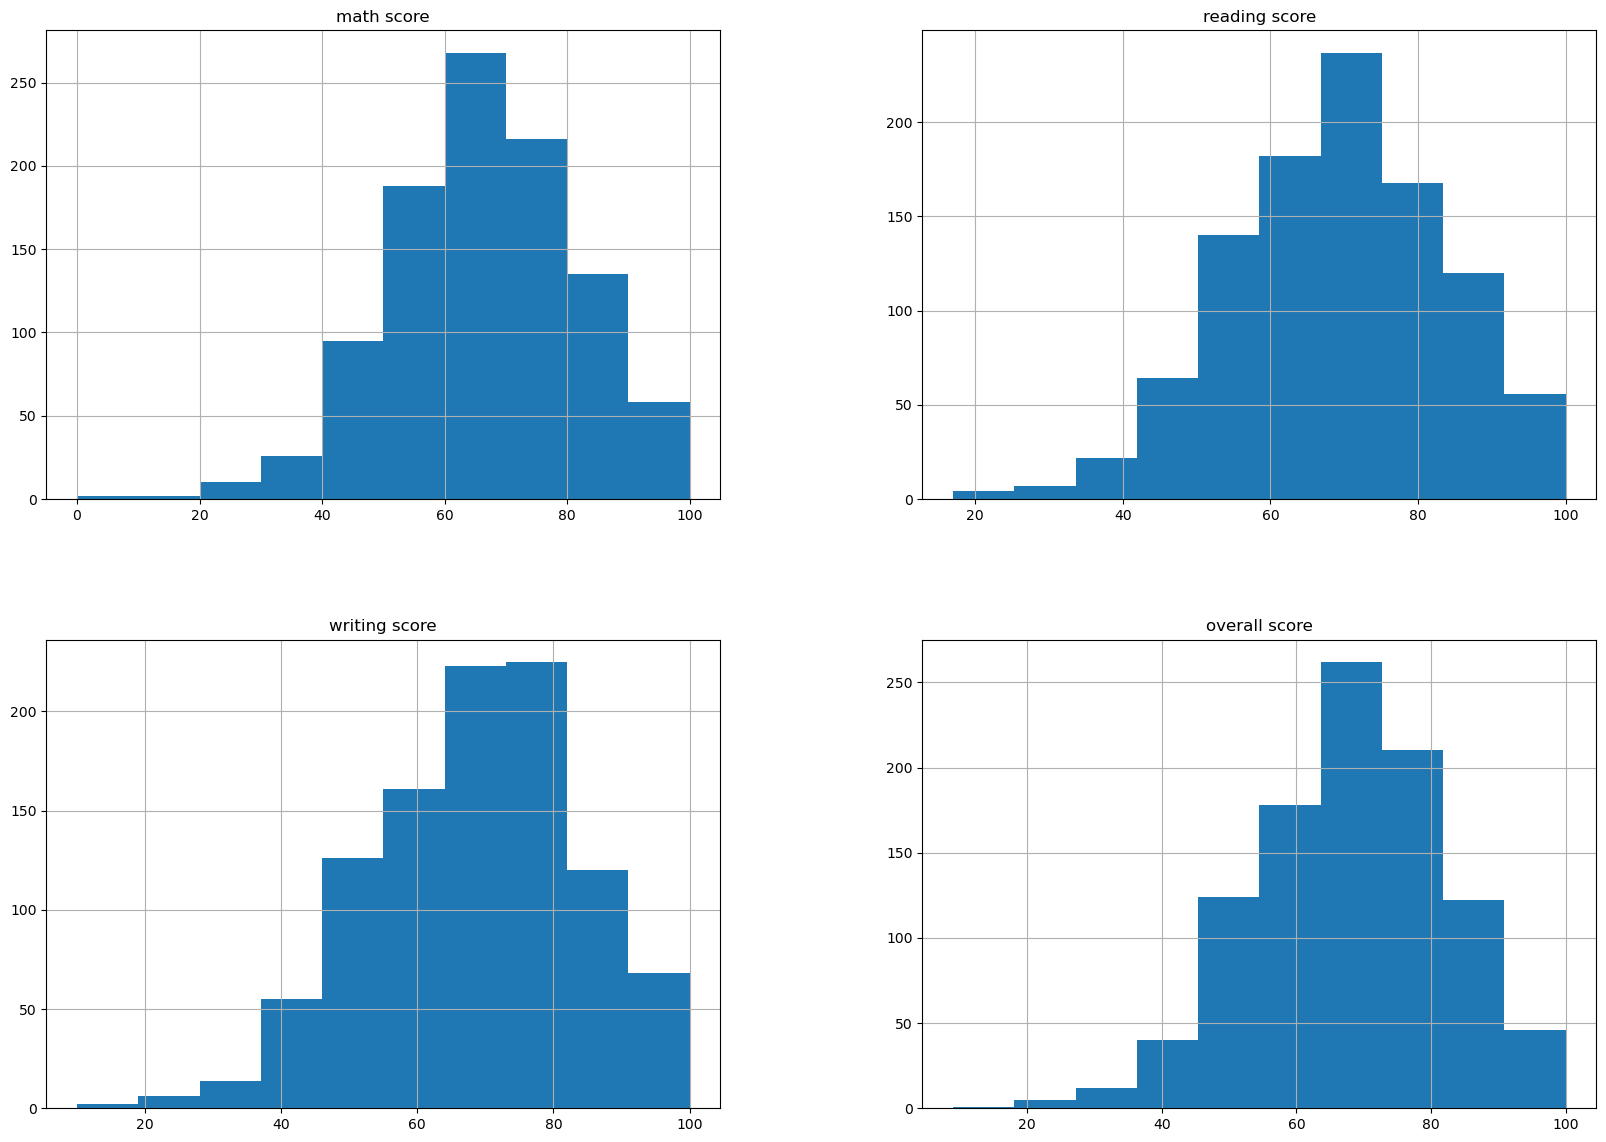

In [15]:
df.hist(figsize=(20,14))
plt.show()

the diagram below shows the attirbutes' values and their percentage:

In [16]:
fig = make_subplots(rows=3, cols=2,
specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie","colspan": 2}, None]],

    subplot_titles=("Gender", "Race/Ethnicity", "parental level of education", "lunch","test preparation course"))
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','goldenrod']



fig.add_trace(go.Pie(labels=['female','male'], values=df['gender'].value_counts()),
              row=1, col=1)

fig.add_trace(go.Pie(labels=['group C','group D','group B','group E','group A'], values=df['race/ethnicity'].value_counts()),
              row=1, col=2)

fig.add_trace(go.Pie(labels=['high school','diploma', 
       "associate's degree", "bachelor's degree", "master's degree", ], values=df['parental level of education'].value_counts()),
              row=2, col=1)

fig.add_trace(go.Pie(labels=['standard', 'free/reduced'], values=df['lunch'].value_counts()),
              row=2, col=2)

fig.add_trace(go.Pie(labels=['not completed', 'completed'], values=df['test preparation course'].value_counts()),
              row=3, col=1)

fig.update_traces(hoverinfo='label+percent', 
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(height=800, width=700,
                  title_text="features overview",
                  showlegend=False)


fig.show()

we will explore scores' relationship with every attribute

### scores and gender

we will explore the relatonship between the scores and the gender of the students

In [17]:
df[df['gender']=='female'].mean(numeric_only=True)

math score       63.633205
reading score    72.608108
writing score    72.467181
overall score    69.569498
dtype: float64

In [18]:
df[df['gender']=='male'].mean(numeric_only=True)

math score       68.728216
reading score    65.473029
writing score    63.311203
overall score    65.837483
dtype: float64

Females have a higher overall scores, Also in writing and reading scores
but, male students have higher math score

### scores and race/ethnicity

races have been encoded into groups from A to E to avoid bias 

since this data only have few outliers, the mean and the median are very similer

In [19]:
px.box(df, y='overall score',points="all",color="race/ethnicity",
        
        title="overall score of all race groups",)


In [20]:
df.groupby("race/ethnicity")['overall score'].mean()

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: overall score, dtype: float64

regarding the overall scores, the group E is the highest one, followed by D, C, B, and lastly A

In [21]:
fig =px.box(df, y='math score',color="race/ethnicity",
        
        title="math score of all race groups",)

fig.update_layout(
    
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,

        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)


regarding the math scores, the group E is the highest one, followed by D, C, B, and lastly A

In [22]:
fig = px.box(df, y='reading score',color="race/ethnicity",
        
        title="reading score of all race groups",)

fig.update_layout(
    
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,

        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

regarding the reading scores, the group E is the highest one, followed by (D, C) with the same mean then, B, and lastly A

In [23]:
fig =px.box(df, y='writing score',color="race/ethnicity",
        
        title="writing score of all race groups",)
fig.update_layout(
    
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,

        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

regarding the writing scores, the group E and D are the highest groups, followed by C, B, and lastly A

the result is that race can affect the student performance, every culture have different point of view which can play a part in our lives and how we can do things and the expected results 

Race E is the one how have a better chance of scoring higher scores and race A have lower chance of doing the same 

### scores and test preparation course

this histogram shows the probability of given score based on whether the student completed the test preparation course or not  

In [24]:
fig = px.histogram(df, x="overall score", histnorm='probability',color="test preparation course",barmode='overlay')
fig.show()

students who completed the course have a better results 

### scores and lunch type

In [25]:
df[df['lunch'] =="free/reduced"]['overall score'].mean()

62.199061032863845

In [26]:
df[df['lunch'] =="standard"]['overall score'].mean()

70.83720930232563

The lunch is a symbol of the financial stability of the student's family, which affects their health in regard to providing good meals for the student.
The difference between the averages of the students who have standard and free/reduced lunch is noticeable, which is a good indicator that lunch plays an important role in the students' performance.

### scores and parental level of education


In the next 3 diagrams, we will explore the relationship between the parent's education and the student performance in each subject.

In [30]:

fig=px.histogram(df,histfunc="count", x='math grade', facet_col='parental level of education',title="Math scores and parents level of education"
        ).update_xaxes(categoryorder='category ascending')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In math, everybody seems to be failing their children, the most common grades are F or D 

suprisengly, the parents who have a master's degree, their children have more F than the students who have parents with bachelor's or diplome degree


In [31]:

fig=px.histogram(df,histfunc="count", x='reading grade', facet_col='parental level of education',title="Reading scores and parents level of education"
        ).update_xaxes(categoryorder='category ascending')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In reading, the most common grade is C 

But for the high school parents, the most common grade is F

In [32]:

fig=px.histogram(df,histfunc="count", x='writing grade', facet_col='parental level of education',title="Writing scores and parents level of education"
        ).update_xaxes(categoryorder='category ascending')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In Writing, the most common grade is C 

But for the high school parents, the most common grade is F

the expected outcome of this analysis is that the parents' education have a direct affect on the students' performance, but it turned out false

It might open a new point of view where we discuss if the degree can affect the time that the parents spend to teach their children or they type of treatment that they provide but since we don't have enough data to dive deep in this, we can conclude that the parents education doesn't have a clear relationship with the student performance

## conclusion 

student performance is affected by many factors, some of them have a stronger relationship than others.